### Using multiple classifiers to find the top/bottom 100 stocks

In [1]:
import pandas as pd
import numpy as np

# Load the Independent / X-Variable features

In [2]:
csv_data = pd.read_csv('SP500_Index_Normalized_Features.csv') #read the cleaned and normalized csv

csv_data['Date'] = pd.to_datetime(csv_data['Date'], format="%Y-%m-%d") #Date column to datetime, just to make sure (this is just a precaution, dataframe should already be in this format)
csv_data = csv_data.sort_values(by='Date', ascending=True).reset_index(drop=True) #dates sorted to better visualize output (this is just a precaution, dataframe should already be in this format)

csv_data # look at the data 

,Date,Ticker,Name,Sector,Price_Returns_12m,Price_Returns_6m,Price_Returns_3m,Price_Returns_1m,Moving_Avg_Returns_12m,Moving_Avg_Returns_6m,...,PB,Trail_EV_EBITDA,Trail_PE,Trail3yrAvg_EPSgro,Trail3yrAvg_DPSgro,Volatility,Debt_to_MktCap,NetDebt_EBITDA,Trail1yr_EPSgro,Trail1yr_DPSgro
0,2001-12-31,DVN,DEVON ENERGY CO,Energy,0.14293,0.36564,0.31219,0.59225,0.41990,0.53320,...,0.01075,0.00267,0.00631,0.41488,0.27215,0.26616,0.08911,0.07375,0.03595,0.25038
1,2001-12-31,HSY,HERSHEY CO/THE,Consumer Staples,0.25097,0.56471,0.28428,0.48704,0.57681,0.66079,...,0.06961,0.00838,0.02737,0.33652,0.31837,0.07804,0.00635,0.07147,0.03728,0.27004
2,2001-12-31,SPGI,S&P GLOBAL INC,Financials,0.24743,0.46879,0.28818,0.53895,0.57295,0.59866,...,0.05470,0.00830,0.02794,0.34179,0.31612,0.15425,0.00590,0.07152,0.04084,0.26100
3,2001-12-31,1255173D,WACHOVIA CORP,Financials,0.27336,0.45867,0.27743,0.46289,0.61219,0.59037,...,0.01080,0.00772,0.01518,0.33330,0.18577,0.17720,0.13291,0.07420,0.04167,0.12517
4,2001-12-31,NEM,NEWMONT CORP,Materials,0.26484,0.52295,0.20880,0.41651,0.60565,0.64239,...,0.02000,0.00697,0.23388,0.49926,0.27215,0.27910,0.02509,0.07331,0.02519,0.25033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113313,2021-06-30,DGX,QUEST DIAGNOSTIC,Health Care,0.11757,0.27166,0.41280,0.34777,0.24272,0.33557,...,0.00654,0.03983,0.00050,0.03751,0.19068,0.16435,0.04361,0.60228,0.25181,0.01069
113314,2021-06-30,ATVI,ACTIVISION BLIZZ,Communication Services,0.13778,0.20577,0.41024,0.30115,0.26987,0.25163,...,0.01378,0.13161,0.00561,0.03104,0.19946,0.24063,0.00912,0.55509,0.21642,0.01146
113315,2021-06-30,ROK,ROCKWELL AUTOMAT,Industrials,0.16258,0.29664,0.47408,0.53138,0.30255,0.35415,...,0.05697,0.16872,0.00639,0.03110,0.19194,0.17081,0.01341,0.60577,0.21064,0.01049
113316,2021-06-30,DXC,DXC TECHNOLOGY C,Information Technology,0.40326,0.57815,0.68071,0.40271,0.59372,0.64506,...,0.00464,0.04439,0.00820,0.02159,0.17359,0.55839,0.13173,0.62643,0.19701,0.00000


In [3]:
csv_data.columns.to_list()

['Date',
 'Ticker',
 'Name',
 'Sector',
 'Price_Returns_12m',
 'Price_Returns_6m',
 'Price_Returns_3m',
 'Price_Returns_1m',
 'Moving_Avg_Returns_12m',
 'Moving_Avg_Returns_6m',
 'Moving_Avg_Returns_3m',
 'Trail_DivYld',
 'PB',
 'Trail_EV_EBITDA',
 'Trail_PE',
 'Trail3yrAvg_EPSgro',
 'Trail3yrAvg_DPSgro',
 'Volatility',
 'Debt_to_MktCap',
 'NetDebt_EBITDA',
 'Trail1yr_EPSgro',
 'Trail1yr_DPSgro']

# Load the Dependent / y-variable 

In [4]:
y_csv_data = pd.read_csv('SP500_Supervised_Y_Variable_Options.csv')# all the possible y variables

y_csv_data['Date'] = pd.to_datetime(y_csv_data['Date'], format="%Y-%m-%d") #Date column to datetime, just to make sure (this is just a precaution, dataframe should already be in this format)
y_csv_data = y_csv_data.sort_values(by='Date', ascending=True).reset_index(drop=True) #dates sorted to better visualize output (this is just a precaution, dataframe should already be in this format)

y_csv_data # look at the data 

,Date,Ticker,Name,Sector,PRIOR_Returns_1m,FUTURE_Returns_1m,FUTURE_Returns_zscore_overall,FUTURE_Returns_zscore_bySector,FUTURE_Returns_MinMax_overall,FUTURE_Returns_MinMax_bySector,FUTURE_Returns_quintile_overall,FUTURE_Returns_quintile_bySector,FUTURE_Returns_top_bot_100_overall,FUTURE_Returns_top_bot_100_bySector,FUTURE_Returns_decile_overall,FUTURE_Returns_decile_bySector,FUTURE_Returns_top_bot_50_overall,FUTURE_Returns_top_bot_50_bySector
0,2001-01-31,ROH,ROHM AND HAAS CO,Materials,-0.011360,0.220588,1.106160,0.948310,0.532108,0.664444,4.0,4.0,4,4.0,8.0,8.0,5,5.0
1,2001-01-31,SBUX,STARBUCKS CORP,Consumer Discretionary,0.128531,-0.028807,-0.693748,-0.802539,0.342119,0.324411,1.0,1.0,2,2.0,2.0,2.0,5,5.0
2,2001-01-31,SPLS,STAPLES INC,Consumer Discretionary,0.402116,-0.015625,-0.598615,-0.704078,0.352161,0.345999,1.0,1.0,2,2.0,2.0,2.0,5,5.0
3,2001-01-31,CMCSK,COMCAST CORP-SPL,Communication Services,0.025449,0.086179,0.136114,0.909245,0.429715,0.776769,2.0,3.0,2,2.0,5.0,7.0,5,5.0
4,2001-01-31,AAMRQ,AMR CORP,Industrials,-0.002488,0.171963,0.755224,0.835152,0.495065,0.594089,3.0,4.0,2,4.0,7.0,8.0,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122458,2021-06-30,BA,BOEING CO/THE,Industrials,-0.030200,0.054244,0.598702,0.646625,0.499848,0.591674,3.0,3.0,2,2.0,7.0,7.0,5,5.0
122459,2021-06-30,AVGO,BROADCOM INC,Information Technology,0.017371,0.035357,0.273763,0.429447,0.457997,0.421776,3.0,3.0,2,2.0,6.0,6.0,5,5.0
122460,2021-06-30,VZ,VERIZON COMMUNIC,Communication Services,-0.008143,-0.022495,-0.721551,-0.630375,0.329806,0.503768,1.0,0.0,2,0.0,2.0,1.0,5,5.0
122461,2021-06-30,PSX,PHILLIPS 66,Energy,0.018998,0.052024,0.560500,-0.385256,0.494927,0.281770,3.0,1.0,2,2.0,7.0,3.0,5,5.0


In [5]:
y_csv_data.columns.to_list()

['Date',
 'Ticker',
 'Name',
 'Sector',
 'PRIOR_Returns_1m',
 'FUTURE_Returns_1m',
 'FUTURE_Returns_zscore_overall',
 'FUTURE_Returns_zscore_bySector',
 'FUTURE_Returns_MinMax_overall',
 'FUTURE_Returns_MinMax_bySector',
 'FUTURE_Returns_quintile_overall',
 'FUTURE_Returns_quintile_bySector',
 'FUTURE_Returns_top_bot_100_overall',
 'FUTURE_Returns_top_bot_100_bySector',
 'FUTURE_Returns_decile_overall',
 'FUTURE_Returns_decile_bySector',
 'FUTURE_Returns_top_bot_50_overall',
 'FUTURE_Returns_top_bot_50_bySector']

# Combine X-variable dataframe and y-variable dataframe
## And remove un-wanted columns

In [6]:
combined_df = csv_data.merge(y_csv_data, how='left', on=['Date','Ticker','Name','Sector']).copy()# put x and y together 

### drop un-wanted columns that are neither x-variables nor y-variables, 
combined_df.drop(['PRIOR_Returns_1m', 'FUTURE_Returns_1m'], axis=1, inplace=True)

### drop y-variable options that are normalized or ranked by Sector instead of Overall, as our EDA suggested we focus on Overall
combined_df.drop(['FUTURE_Returns_zscore_bySector', 'FUTURE_Returns_MinMax_bySector', 'FUTURE_Returns_quintile_bySector', 'FUTURE_Returns_decile_bySector'], axis=1, inplace=True)

### drop remaining y-variable option normalized by z-score, as we prefer to scale by MinMax
combined_df.drop(['FUTURE_Returns_zscore_overall'], axis=1, inplace=True)

### drop remaining NaNs, which would be generated by merging by the left-hand side (the features)
### these are those ~400+ instances where there simply was not a Prior row for that stock on which to create a Future Return for the y-variable options.
combined_df = combined_df.dropna()


combined_df.sample(10)

,Date,Ticker,Name,Sector,Price_Returns_12m,Price_Returns_6m,Price_Returns_3m,Price_Returns_1m,Moving_Avg_Returns_12m,Moving_Avg_Returns_6m,...,NetDebt_EBITDA,Trail1yr_EPSgro,Trail1yr_DPSgro,FUTURE_Returns_MinMax_overall,FUTURE_Returns_quintile_overall,FUTURE_Returns_top_bot_100_overall,FUTURE_Returns_top_bot_100_bySector,FUTURE_Returns_decile_overall,FUTURE_Returns_top_bot_50_overall,FUTURE_Returns_top_bot_50_bySector
64163,2013-02-28,FLR,FLUOR CORP,Industrials,0.34828,0.23020,0.26613,0.39815,0.51765,0.31989,...,0.31052,0.78426,0.15170,0.269191,4.0,4.0,4.0,8.0,5.0,5.0
3605,2002-07-31,1280712D,NOVELLUS SYS,Information Technology,0.28182,0.34476,0.40523,0.33208,0.63620,0.57307,...,0.21480,0.79126,0.31819,0.482395,0.0,0.0,2.0,1.0,5.0,5.0
46894,2010-02-28,RHI,ROBERT HALF INTL,Industrials,0.11187,0.41435,0.66171,0.33348,0.28469,0.45325,...,0.17001,0.81194,0.18147,0.363488,3.0,2.0,4.0,7.0,5.0,5.0
30666,2007-04-30,GR,GOODRICH CORP,Industrials,0.44837,0.42810,0.45988,0.39002,0.58345,0.53248,...,0.84508,0.38815,0.09735,0.542507,4.0,4.0,4.0,8.0,5.0,5.0
35439,2008-02-29,LM,LEGG MASON INC,Financials,0.25818,0.33813,0.44391,0.31301,0.48644,0.52246,...,0.43017,0.78191,0.01806,0.483332,3.0,2.0,2.0,6.0,5.0,5.0
26449,2006-07-31,HET,HARRAH'S ENTERTA,Consumer Discretionary,0.20772,0.36559,0.32492,0.44721,0.33755,0.47890,...,0.11371,0.58698,0.07563,0.356878,0.0,0.0,0.0,1.0,5.0,5.0
89106,2017-06-30,NOV,NOV INC,Energy,0.17463,0.27200,0.21063,0.42643,0.32539,0.38039,...,0.97520,0.40376,0.02608,0.311016,0.0,0.0,2.0,1.0,5.0,5.0
8807,2003-06-30,2987536Q,SYMBOL TECHNOLOG,Information Technology,0.23935,0.30680,0.33010,0.45525,0.52423,0.43644,...,0.22391,0.49530,0.24988,0.352054,4.0,4.0,2.0,9.0,10.0,5.0
20980,2005-07-31,TWX,TIME WARNER INC,Communication Services,0.26571,0.33250,0.11202,0.33587,0.41146,0.35036,...,0.30292,0.26036,0.04365,0.360923,0.0,0.0,2.0,1.0,5.0,5.0
18984,2005-03-31,HSP,HOSPIRA INC,Health Care,0.28153,0.34016,0.41514,0.61106,0.43210,0.45802,...,0.24715,0.70446,0.04939,0.553599,2.0,2.0,2.0,5.0,5.0,5.0


In [7]:
### Helpful lists of our X features and y variable options
X_features_columns = ['Price_Returns_12m', 'Price_Returns_3m', 'Price_Returns_1m', 'Trail_DivYld', 'PB', 'Trail_EV_EBITDA', 'Trail_PE', 'Trail3yrAvg_EPSgro', 'Trail3yrAvg_DPSgro', 'Volatility', 'Debt_to_MktCap', 'NetDebt_EBITDA', 'Trail1yr_EPSgro', 'Trail1yr_DPSgro']
y_option_columns = ['FUTURE_Returns_MinMax_overall', 'FUTURE_Returns_quintile_overall', 'FUTURE_Returns_decile_overall', 'FUTURE_Returns_top_bot_100_overall', 'FUTURE_Returns_top_bot_50_overall']

# Start of Supervised Learning Analysis...


In [8]:
# get the x and y
X = combined_df.loc[:,X_features_columns]
y = combined_df.loc[:,y_option_columns]

In [9]:
from sklearn.model_selection import train_test_split
# split data into 90% training and 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [10]:
#create a function that prints the classifer scores
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score,roc_auc_score
def print_clf_scores(y_test_clf, pred):
    print("accuracy_score: ",accuracy_score(y_test_clf, pred))
    print("precision_score: ",precision_score(y_test_clf, pred, average='macro'))
    print("recall_score: ",recall_score(y_test_clf, pred, average='macro'))
    print("f1_score: ",f1_score(y_test_clf, pred, average='macro'))

In [11]:
# choose the y variable being used for this analysis     
y_train_clf=y_train.FUTURE_Returns_top_bot_100_overall
y_test_clf=y_test.FUTURE_Returns_top_bot_100_overall

### Dummy Classifer

In [12]:
from sklearn.dummy import DummyClassifier
dc=DummyClassifier(strategy='most_frequent')
dc.fit(X_train, y_train_clf)

DummyClassifier(strategy='most_frequent')

In [13]:
pred = dc.predict(X_test)
print_clf_scores(y_test_clf, pred)

accuracy_score:  0.6035261805617081
precision_score:  0.20117539352056937
recall_score:  0.3333333333333333
f1_score:  0.2509162568834374


/Users/jasontan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import loguniform, uniform
import matplotlib.pyplot as plt

lr = LogisticRegression(random_state=0, n_jobs=-1)
parameters={'penalty':['l2','none'], 'C':uniform(loc=0, scale=100)}
clf=RandomizedSearchCV(lr, parameters, scoring=f1_score, n_jobs=-1, cv=5)
clf.fit(X_train, y_train_clf)
clf.best_estimator_

/Users/jasontan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


LogisticRegression(C=38.36226276223484, n_jobs=-1, random_state=0)

In [15]:
pred = clf.predict(X_test)
print_clf_scores(y_test_clf, pred)

accuracy_score:  0.6334721360857624
precision_score:  0.6046061246749043
recall_score:  0.4290876109397259
f1_score:  0.4338447960295127


### Gaussian Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train, y_train_clf)

GaussianNB()

In [17]:
pred = gnb.predict(X_test)
print_clf_scores(y_test_clf, pred)

accuracy_score:  0.6006910605120935
precision_score:  0.48699451789921494
recall_score:  0.4091599864118782
f1_score:  0.4088429170619107


### Multinomial Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
parameters={'alpha':uniform(loc=0, scale=100)}
clf=RandomizedSearchCV(mnb, parameters, scoring=f1_score, n_jobs=-1, cv=5)
clf.fit(X_train, y_train_clf)
clf.best_estimator_

/Users/jasontan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


MultinomialNB(alpha=3.777714743934013)

In [19]:
pred = clf.predict(X_test)
print_clf_scores(y_test_clf, pred)

accuracy_score:  0.6035261805617081
precision_score:  0.20117539352056937
recall_score:  0.3333333333333333
f1_score:  0.2509162568834374


/Users/jasontan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### K-nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=-1)
parameters={'n_neighbors':[1,3,5]}
clf=GridSearchCV(knn, parameters, scoring=f1_score, n_jobs=-1, cv=5)
clf.fit(X_train, y_train_clf)
clf.best_estimator_

/Users/jasontan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [21]:
pred = clf.predict(X_test)
print_clf_scores(y_test_clf, pred)

accuracy_score:  0.5759723575795163
precision_score:  0.5033886592247168
recall_score:  0.49589987827552395
f1_score:  0.4993101132147429


### Quadratic Discriminant Analysis

In [22]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train_clf)

QuadraticDiscriminantAnalysis()

In [23]:
pred = qda.predict(X_test)
print_clf_scores(y_test_clf, pred)

accuracy_score:  0.6067156906175246
precision_score:  0.5085584201106842
recall_score:  0.4140590747283006
f1_score:  0.41577689216477515


### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
parameters={'max_depth':[10,100,None], 'min_samples_leaf':[10,100, 1000]}
clf=GridSearchCV(dt, parameters, scoring=f1_score, n_jobs=-1, cv=5)
clf.fit(X_train, y_train_clf)
clf.best_estimator_

/Users/jasontan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=0)

In [25]:
pred = clf.predict(X_test)
print_clf_scores(y_test_clf, pred)

accuracy_score:  0.6277132984849827
precision_score:  0.5689725185416546
recall_score:  0.45443818113136425
f1_score:  0.46898976623369104


### Ada Boost

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=0, n_estimators=100)
parameters={'learning_rate':uniform(loc=0, scale=10)}
clf=RandomizedSearchCV(ada, parameters, scoring=f1_score, n_jobs=-1, cv=5)
clf.fit(X_train, y_train_clf)
clf.best_estimator_

/Users/jasontan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


AdaBoostClassifier(learning_rate=4.669317477060773, n_estimators=100,
                   random_state=0)

In [27]:
pred = clf.predict(X_test)
print_clf_scores(y_test_clf, pred)

accuracy_score:  0.11783467706210685
precision_score:  0.07661332489058537
recall_score:  0.19845258136588528
f1_score:  0.10854755319693439


/Users/jasontan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest (The focus of the report)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators=100, max_depth=None)
parameters={'min_samples_split':[2,10,100]}
clf=GridSearchCV(rf, parameters, scoring=f1_score, n_jobs=-1, cv=5)
clf.fit(X_train, y_train_clf)
clf.best_estimator_

/Users/jasontan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


RandomForestClassifier(n_jobs=-1, random_state=0)

In [29]:
pred = clf.predict(X_test)
print_clf_scores(y_test_clf, pred)

accuracy_score:  0.6490652963586427
precision_score:  0.6202951809452432
recall_score:  0.4753257227845984
f1_score:  0.49619829140964683


### Gradient Boosting Classifier

In [30]:
# from sklearn.ensemble import GradientBoostingClassifier
# gb=GradientBoostingClassifier(random_state=0)
# parameters={'max_depth':[10,100], 'min_samples_leaf':[1, 10,100], 'learning_rate':[0.1,1,10]}
# clf=GridSearchCV(gb, parameters, scoring=f1_score, n_jobs=-1, cv=5)
# clf.fit(X_train, y_train_clf)
# clf.best_estimator_

In [31]:
# pred = clf.predict(X_test)
# print_clf_scores(y_test_clf, pred)

### Linear SVM

In [32]:
# from sklearn.svm import SVC
# lsvc=SVC(kernel='linear')
# parameters={'C':uniform(loc=0, scale=100)}
# clf=RandomizedSearchCV(lsvc, parameters, scoring=f1_score, n_jobs=-1, cv=5)
# clf.fit(X_train, y_train_clf)
# clf.best_estimator_

In [33]:
# pred = clf.predict(X_test)
# print_clf_scores(y_test_clf, pred)

### Kernel SVM

In [34]:
# from sklearn.svm import SVC
# ksvc=SVC()
# parameters={'C':uniform(loc=0, scale=100)}
# clf=RandomizedSearchCV(ksvc, parameters, scoring=f1_score, n_jobs=-1, cv=5)
# clf.fit(X_train, y_train_clf)
# clf.best_estimator_

In [35]:
# pred = clf.predict(X_test)
# print_clf_scores(y_test_clf, pred)

### Failure Analysis

In [36]:
# look at the features of the test set
m=combined_df.reset_index().merge(X_test.reset_index()['index'], how='inner', left_on=['index'], right_on=['index'])
m['predictions']=pred
m

,index,Date,Ticker,Name,Sector,Price_Returns_12m,Price_Returns_6m,Price_Returns_3m,Price_Returns_1m,Moving_Avg_Returns_12m,...,Trail1yr_EPSgro,Trail1yr_DPSgro,FUTURE_Returns_MinMax_overall,FUTURE_Returns_quintile_overall,FUTURE_Returns_top_bot_100_overall,FUTURE_Returns_top_bot_100_bySector,FUTURE_Returns_decile_overall,FUTURE_Returns_top_bot_50_overall,FUTURE_Returns_top_bot_50_bySector,predictions
0,3,2001-12-31,1255173D,WACHOVIA CORP,Financials,0.27336,0.45867,0.27743,0.46289,0.61219,...,0.04167,0.12517,0.446876,2.0,2.0,2.0,4.0,5.0,5.0,2.0
1,6,2001-12-31,NWL,NEWELL BRANDS IN,Consumer Discretionary,0.29594,0.56978,0.34451,0.53384,0.64153,...,0.03512,0.25035,0.296853,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,14,2001-12-31,MER,MERRILL LYNCH,Financials,0.17681,0.44503,0.36588,0.49431,0.48467,...,0.03578,0.26481,0.500232,3.0,2.0,4.0,6.0,5.0,5.0,2.0
3,17,2001-12-31,NI,NISOURCE INC,Utilities,0.17946,0.43339,0.27154,0.56665,0.47648,...,0.03506,0.26889,0.243510,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,23,2001-12-31,WFC,WELLS FARGO & CO,Financials,0.18283,0.47819,0.26556,0.46513,0.47379,...,0.03626,0.27815,0.446366,2.0,2.0,2.0,4.0,5.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11282,113275,2021-06-30,ANSS,ANSYS INC,Information Technology,0.11989,0.14447,0.39872,0.40290,0.24187,...,0.21205,0.00999,0.211674,0.0,0.0,0.0,0.0,0.0,0.0,2.0
11283,113277,2021-06-30,SEE,SEALED AIR CORP,Materials,0.27505,0.41582,0.74615,0.44452,0.44990,...,0.21032,0.01062,0.714268,4.0,4.0,4.0,9.0,10.0,10.0,2.0
11284,113299,2021-06-30,NVR,NVR INC,Consumer Discretionary,0.20136,0.35034,0.44110,0.38198,0.36009,...,0.21691,0.00999,0.321864,0.0,0.0,2.0,1.0,5.0,5.0,2.0
11285,113302,2021-06-30,CTXS,CITRIX SYSTEMS,Information Technology,0.02595,0.10771,0.16668,0.39462,0.06349,...,0.20130,0.01028,0.220599,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [37]:
# get the rows with differences in pred and test
d=m.loc[:,['Date','Ticker','Name','Sector','FUTURE_Returns_top_bot_100_overall','predictions']]
d['diff']=d['FUTURE_Returns_top_bot_100_overall']-d['predictions']
diff=d[d['FUTURE_Returns_top_bot_100_overall']!=d['predictions']]
diff

,Date,Ticker,Name,Sector,FUTURE_Returns_top_bot_100_overall,predictions,diff
1,2001-12-31,NWL,NEWELL BRANDS IN,Consumer Discretionary,0.0,2.0,-2.0
3,2001-12-31,NI,NISOURCE INC,Utilities,0.0,2.0,-2.0
4,2001-12-31,WFC,WELLS FARGO & CO,Financials,2.0,4.0,-2.0
5,2001-12-31,NUE,NUCOR CORP,Materials,4.0,2.0,2.0
7,2001-12-31,IPG,INTERPUBLIC GRP,Communication Services,4.0,2.0,2.0
...,...,...,...,...,...,...,...
11282,2021-06-30,ANSS,ANSYS INC,Information Technology,0.0,2.0,-2.0
11283,2021-06-30,SEE,SEALED AIR CORP,Materials,4.0,2.0,2.0
11284,2021-06-30,NVR,NVR INC,Consumer Discretionary,0.0,2.0,-2.0
11285,2021-06-30,CTXS,CITRIX SYSTEMS,Information Technology,0.0,2.0,-2.0


In [38]:
# feature importance
sorted([*zip(clf.best_estimator_.feature_importances_, X_features_columns)])

[(0.054751034571291705, 'Trail_DivYld'),
 (0.058758504457387985, 'Trail3yrAvg_DPSgro'),
 (0.06040297816030769, 'Trail1yr_DPSgro'),
 (0.062029850720044605, 'Debt_to_MktCap'),
 (0.06241870059285354, 'Trail_EV_EBITDA'),
 (0.06454305433373714, 'NetDebt_EBITDA'),
 (0.06529823998657851, 'PB'),
 (0.0655869734595242, 'Trail_PE'),
 (0.0666567378752911, 'Trail3yrAvg_EPSgro'),
 (0.0673122129987467, 'Trail1yr_EPSgro'),
 (0.07408171906273353, 'Price_Returns_12m'),
 (0.08379696080794502, 'Price_Returns_1m'),
 (0.08984434243977364, 'Volatility'),
 (0.12451869053378467, 'Price_Returns_3m')]

In [39]:
# Average feature for rows with differences
diff.merge(m, how='inner', left_on=['Date','Ticker'], right_on=['Date','Ticker']).mean()#.sort_values()#.loc[:,['Price_Returns_3m','Volatility','Price_Returns_1m','Ticker']].mean()
# Seems like "cheap stocks" are hard to predict

<ipython-input-39-a7f8e467122b>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  diff.merge(m, how='inner', left_on=['Date','Ticker'], right_on=['Date','Ticker']).mean()#.sort_values()#.loc[:,['Price_Returns_3m','Volatility','Price_Returns_1m','Ticker']].mean()


FUTURE_Returns_top_bot_100_overall_x        2.016064
predictions_x                               1.943775
diff                                        0.072289
index                                   57018.470071
Price_Returns_12m                           0.322131
Price_Returns_6m                            0.386613
Price_Returns_3m                            0.417892
Price_Returns_1m                            0.447664
Moving_Avg_Returns_12m                      0.500547
Moving_Avg_Returns_6m                       0.478841
Moving_Avg_Returns_3m                       0.463716
Trail_DivYld                                0.076672
PB                                          0.020608
Trail_EV_EBITDA                             0.048291
Trail_PE                                    0.034799
Trail3yrAvg_EPSgro                          0.210191
Trail3yrAvg_DPSgro                          0.292726
Volatility                                  0.259904
Debt_to_MktCap                              0.

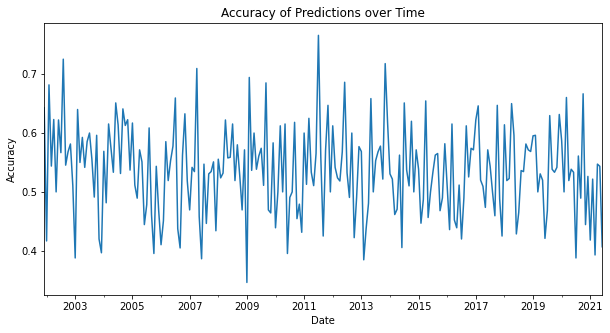

In [40]:
# Accuracy over time 
def get_accuracy(d):
    t=d.FUTURE_Returns_top_bot_100_overall
    p=d.predictions
    return accuracy_score(t,p)
#     return f1_score(t,p, average='macro')

d.loc[:,['Date','FUTURE_Returns_top_bot_100_overall','predictions']].groupby(['Date']).apply(get_accuracy).plot(figsize=(10,5))
plt.title("Accuracy of Predictions over Time")
plt.ylabel("Accuracy")
plt.show()

<AxesSubplot:xlabel='Date'>

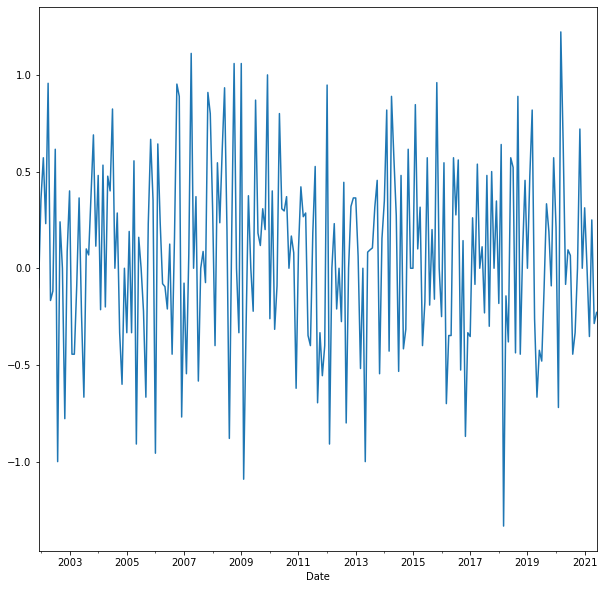

In [41]:
# Average difference over time
diff.groupby(['Date'])['diff'].mean().plot(figsize=(10,10))

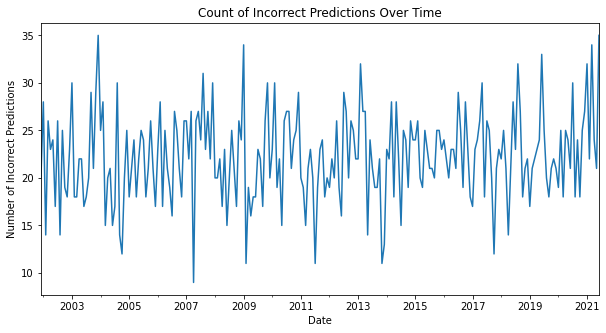

In [42]:
# Count of Difference over time
diff.groupby(['Date']).count().predictions.plot(figsize=(10,5))
# diff[diff['Date']>='2017-12-31'].groupby(['Date']).count().predictions.plot(figsize=(10,10))
plt.title("Count of Incorrect Predictions Over Time")
plt.ylabel("Number of Incorrect Predictions")
plt.show()

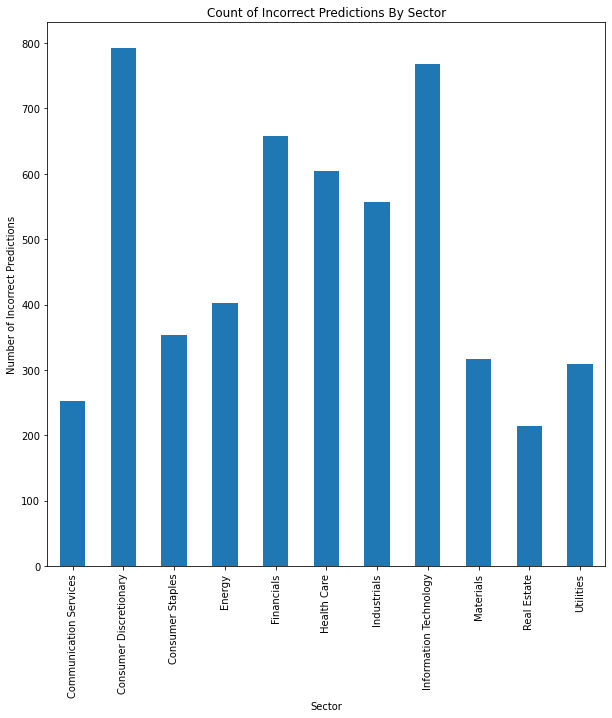

In [43]:
# Differences by sectors
diff.groupby(['Sector']).count().predictions.plot(figsize=(10,10), kind='bar')
plt.title("Count of Incorrect Predictions By Sector")
plt.ylabel("Number of Incorrect Predictions")
plt.show()